# Check python version
import sys
sys.version

In [ ]:
# Install fastai
!pip3 install fastai

In [ ]:
# !pip install fastai==2.2

In [ ]:
import fastai
fastai.__version__

'1.0.61'

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from fastai.imports import *

In [ ]:
# from fastai.vision.all import *
from fastai.vision import *
# from fastai.vision import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/hackathlon/trainFolder'

In [ ]:
path

'/content/drive/MyDrive/hackathlon/trainFolder'

In [ ]:
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()
# from fastbook import *

In [ ]:
# from fastai.vision import ImageDataBunch

In [ ]:
# from fastai.vision.data import ImageList
# il = ImageList.from_folder(path)

In [ ]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2, size = 120)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

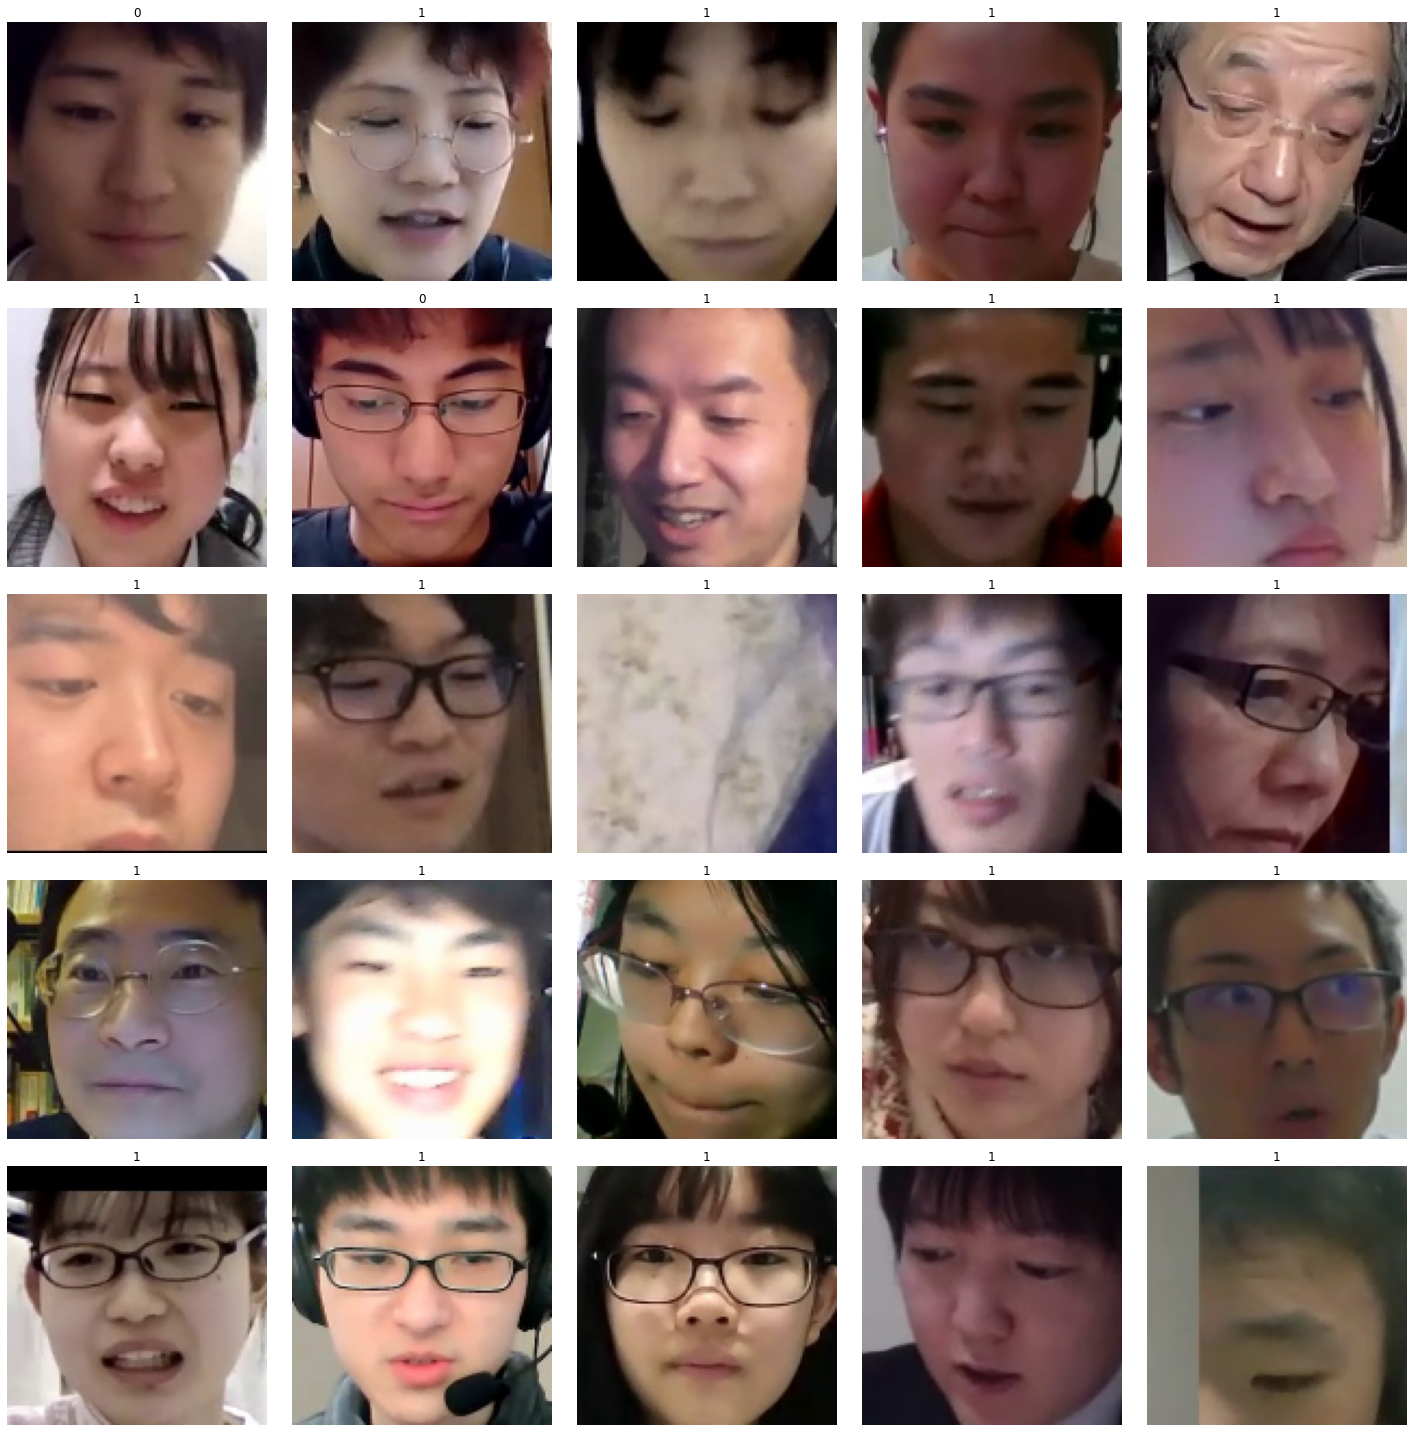

In [ ]:
data.show_batch()

In [ ]:
learn = cnn_learner(data, models.resnet101, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


In [ ]:
# from fastai.vision.learner import cnn_learner

In [ ]:
# learn.fine_tune(2)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# print('abc')

In [ ]:
#  %%capture cap

lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))


# In[ ]:


# lr1 = 1e-3
lr = 1e-1
learn.fit_one_cycle(20,slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,1.389457,2.035908,0.191853,09:12
1,1.044611,0.571501,0.151117,00:18
2,0.721525,0.475003,0.149803,00:15
3,0.517882,0.445241,0.161629,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.378781,0.431637,0.156373,00:15
1,0.361675,0.468965,0.145861,00:15
2,0.380792,0.742929,0.296978,00:15
3,0.434156,1.347494,0.156373,00:15
4,0.750301,1.200927,0.173456,00:15
5,0.964865,0.648815,0.194481,00:15
6,0.854107,0.526670,0.152431,00:15
7,0.680621,1.964645,0.164258,00:15
8,0.563661,7.344179,0.153745,00:15
9,0.514224,5.376035,0.155059,00:15


In [ ]:
 with open('/content/drive/MyDrive/fastai_colab_output.txt', 'w') as out:
   out.write(cap.stdout)

epoch,train_loss,valid_loss,error_rate,time
0,0.183800,50.612541,0.266754,00:18
1,0.335198,1.017045,0.386334,00:18
2,0.369239,24.490337,0.236531,00:18
3,0.322050,18.181648,0.185283,00:18
4,0.266535,0.583695,0.156373,00:18
5,0.221046,0.625356,0.166886,00:18
6,0.148711,1.551859,0.162943,00:18
7,0.095061,0.743748,0.148489,00:18
8,0.057001,0.699911,0.149803,00:18
9,0.034236,0.723809,0.151117,00:18


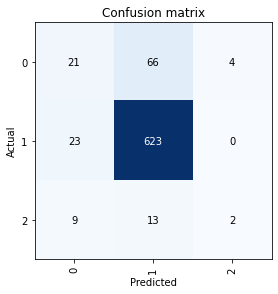

In [ ]:
learn.unfreeze()
# learn.lr_find()
# learn.recorder.plot()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
from fastai.imports import *
from fastai.torch_core import *
# from fastai.learner import *

In [ ]:
@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

NameError: ignored

AttributeError: ignored

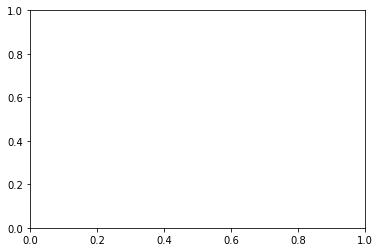

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.predict(open_image('/content/drive/MyDrive/Faces/Unmasked/0_0.jpg'))

(Category tensor(0), tensor(0), tensor([1.0000e+00, 2.4173e-06]))

In [ ]:
learn.data.classes 

['Masked', 'Unmasked']

In [ ]:
!ipython